In [2]:
!pip install pandas numpy scikit-learn seaborn matplotlib 

In [3]:
!pip install plotnine

Instalação dos pacotes

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar, geom_histogram, geom_boxplot, facet_wrap, labs, theme, geom_tile, element_text


In [5]:
# Carregar o conjunto de dados de vinhos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
colnames = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Flavanoids", 
            "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280_OD315", "Proline"]
wine = pd.read_csv(url, header=None, names=colnames)

# Explorar os dados
print(wine.head())
print(wine.describe())


   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

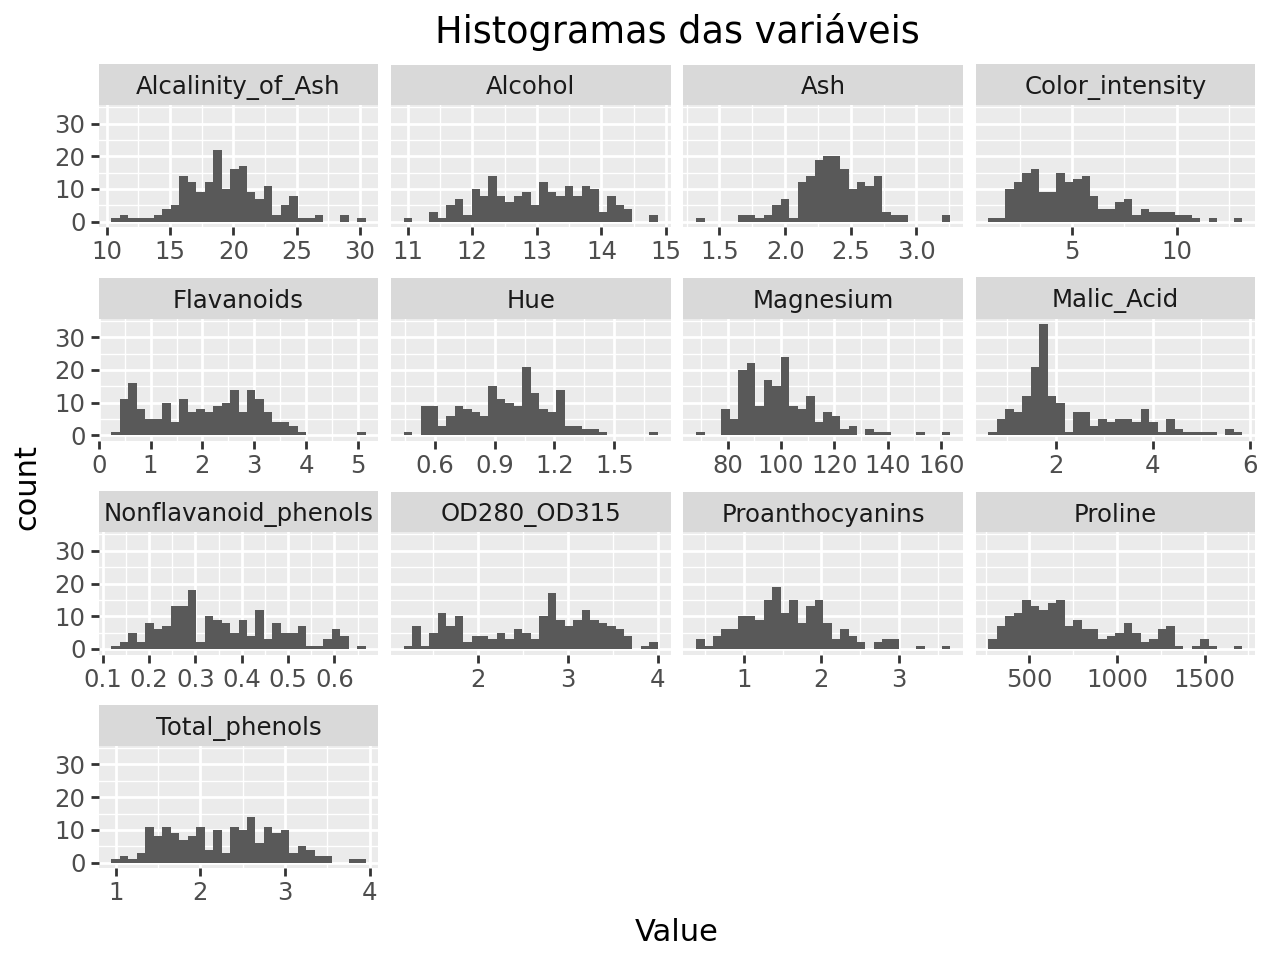

In [6]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, labs, theme

# Histogramas
p = (ggplot(wine.melt(id_vars='Class', var_name='Variable', value_name='Value'), aes(x='Value'))
     + geom_histogram(bins=30)
     + facet_wrap('Variable', scales='free_x')
     + labs(title='Histogramas das variáveis'))
p


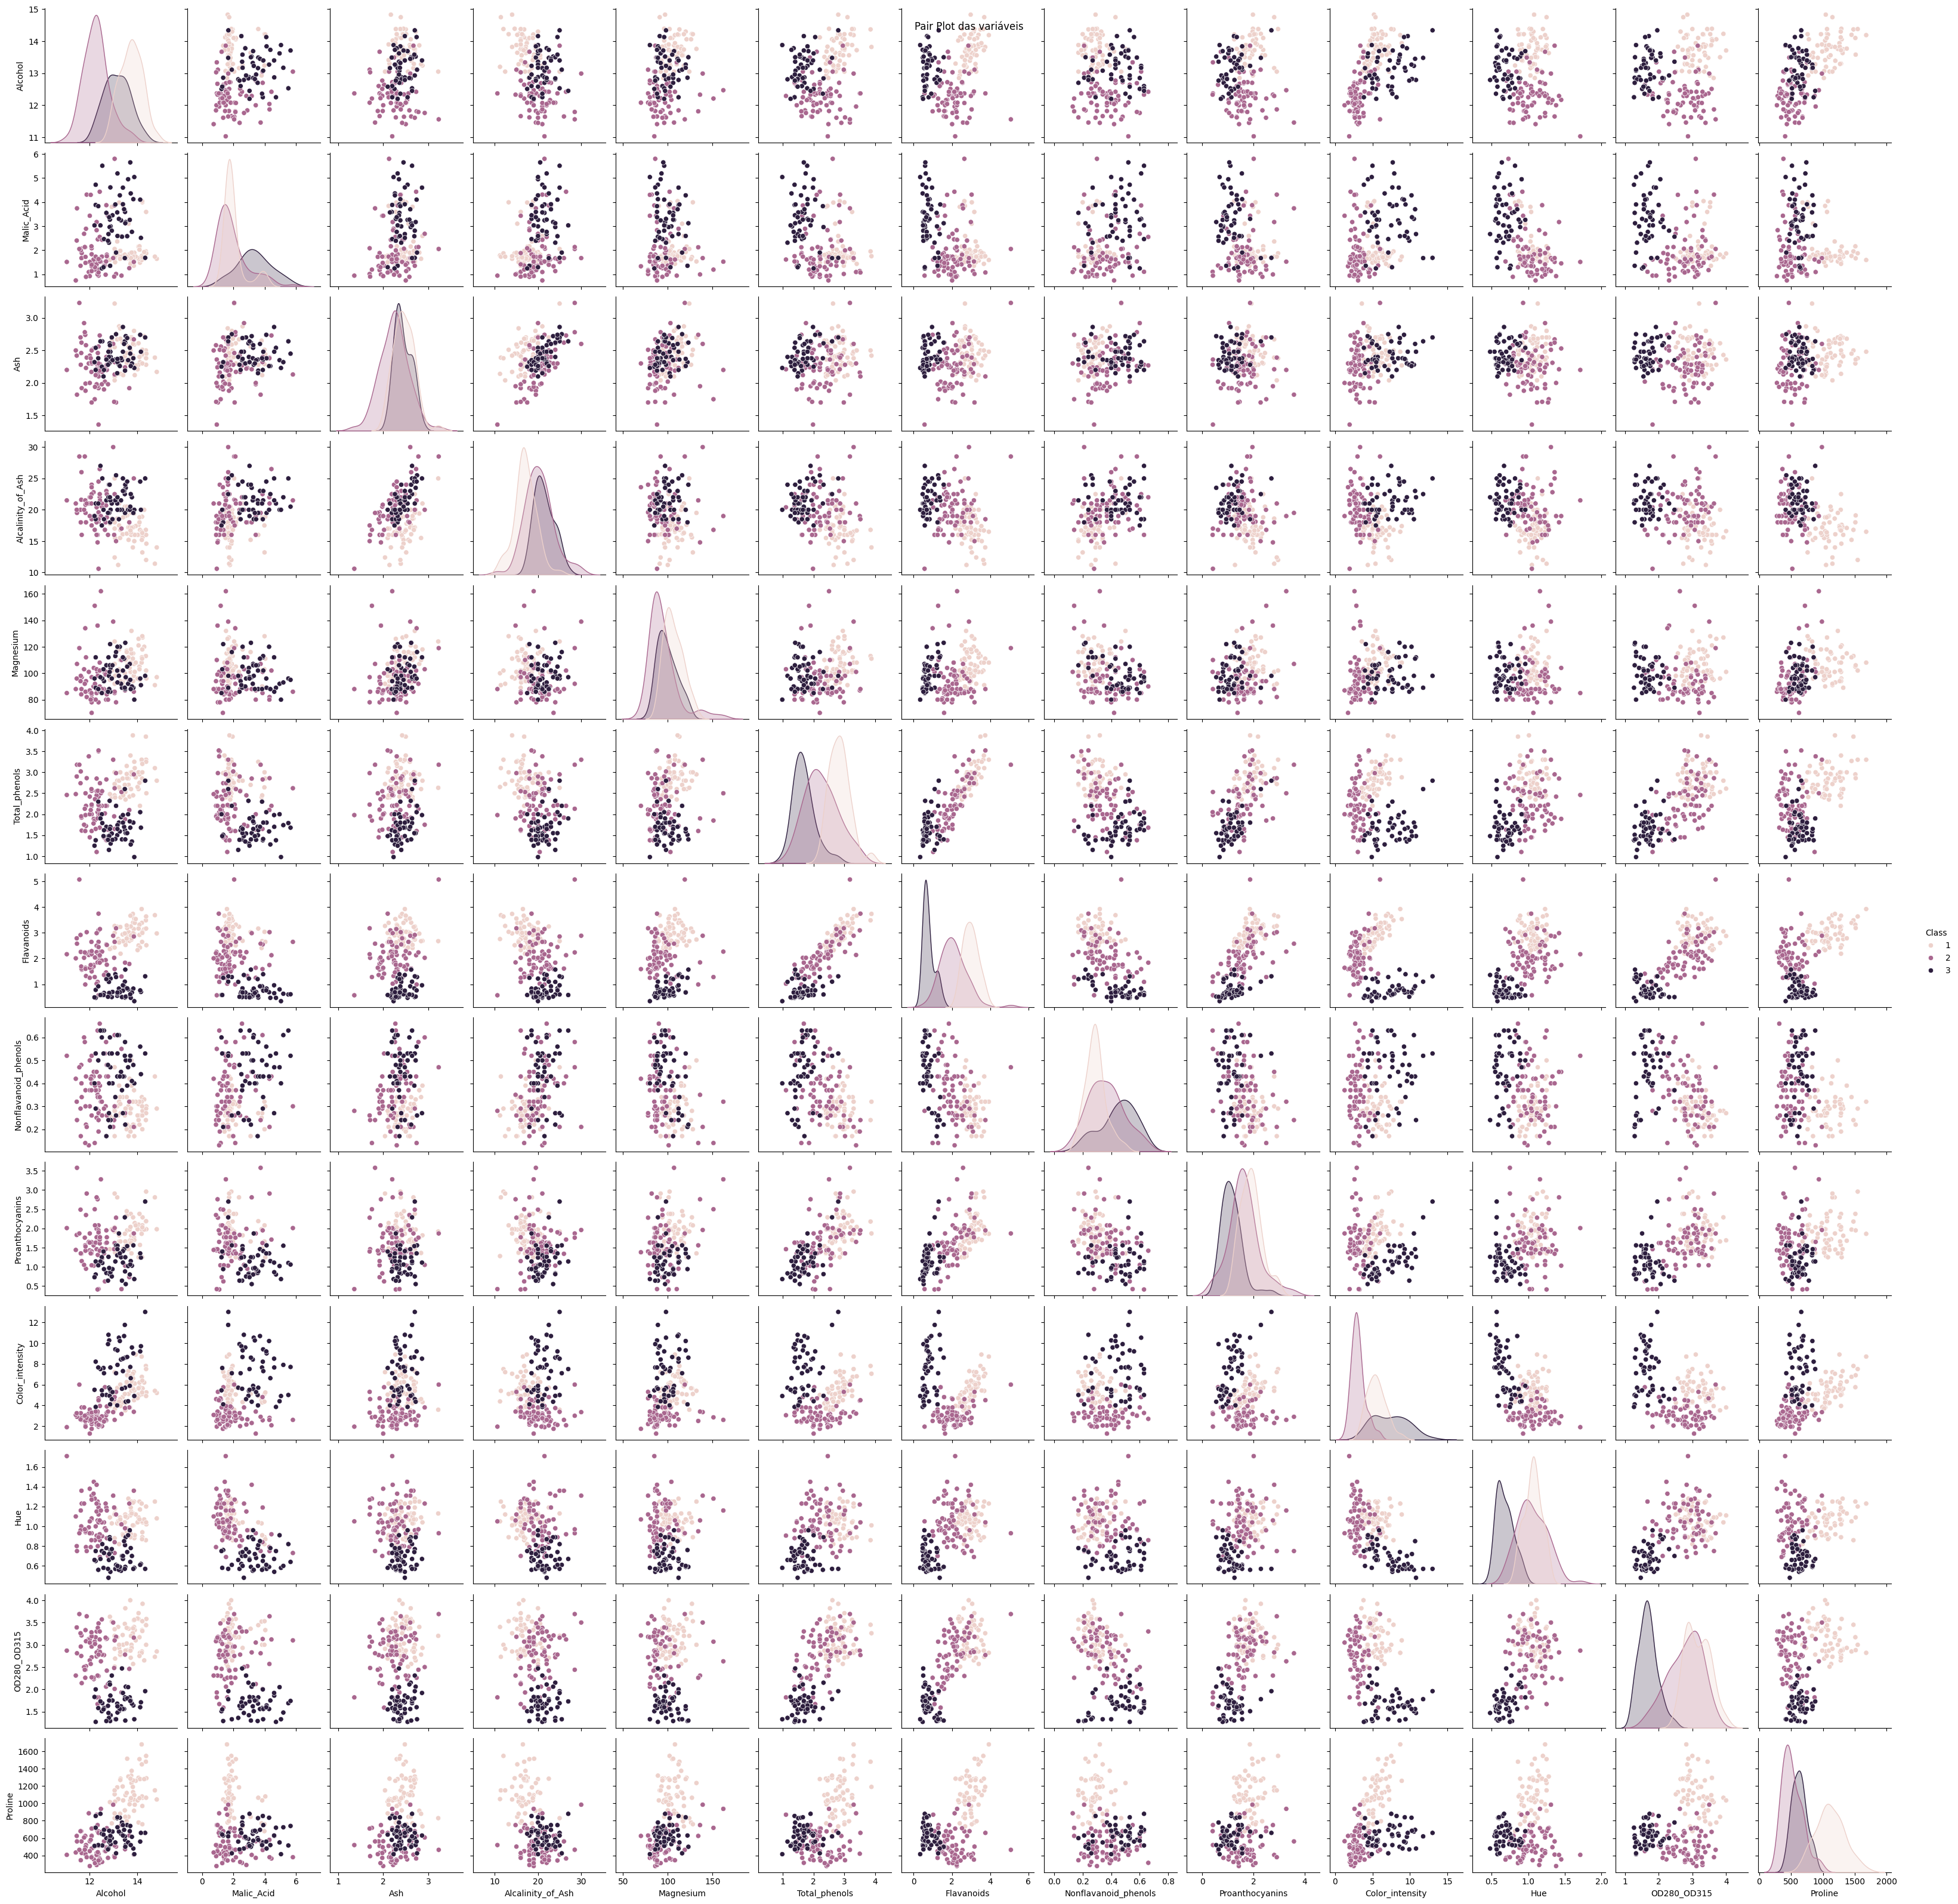

In [7]:
sns.pairplot(wine, hue="Class")
plt.suptitle("Pair Plot das variáveis")
plt.show()


In [8]:
X = wine.drop("Class", axis=1)
y = wine["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel="linear")
}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    acc_score = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, output_dict=True)
    results[model_name] = {
        "Confusion Matrix": conf_matrix,
        "Accuracy": acc_score,
        "Classification Report": class_report
    }


/tmp/ipykernel_23255/1262659006.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


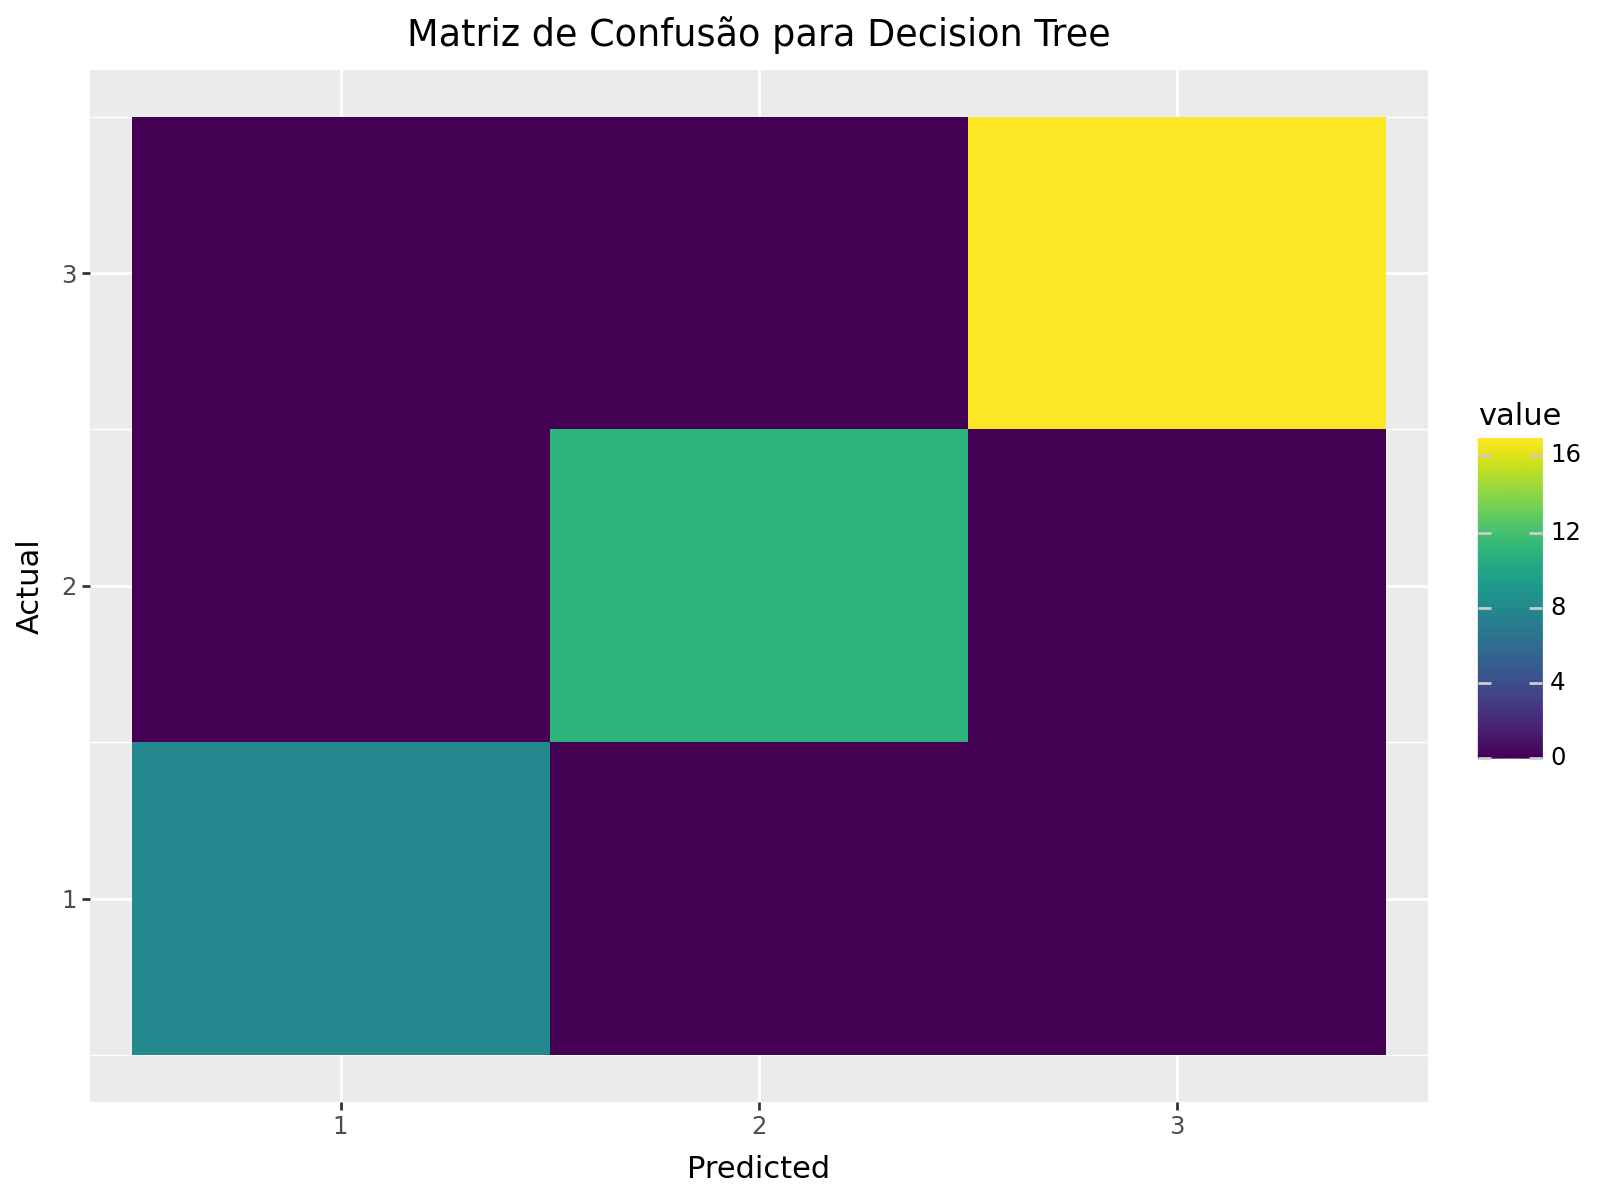

/tmp/ipykernel_23255/1262659006.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


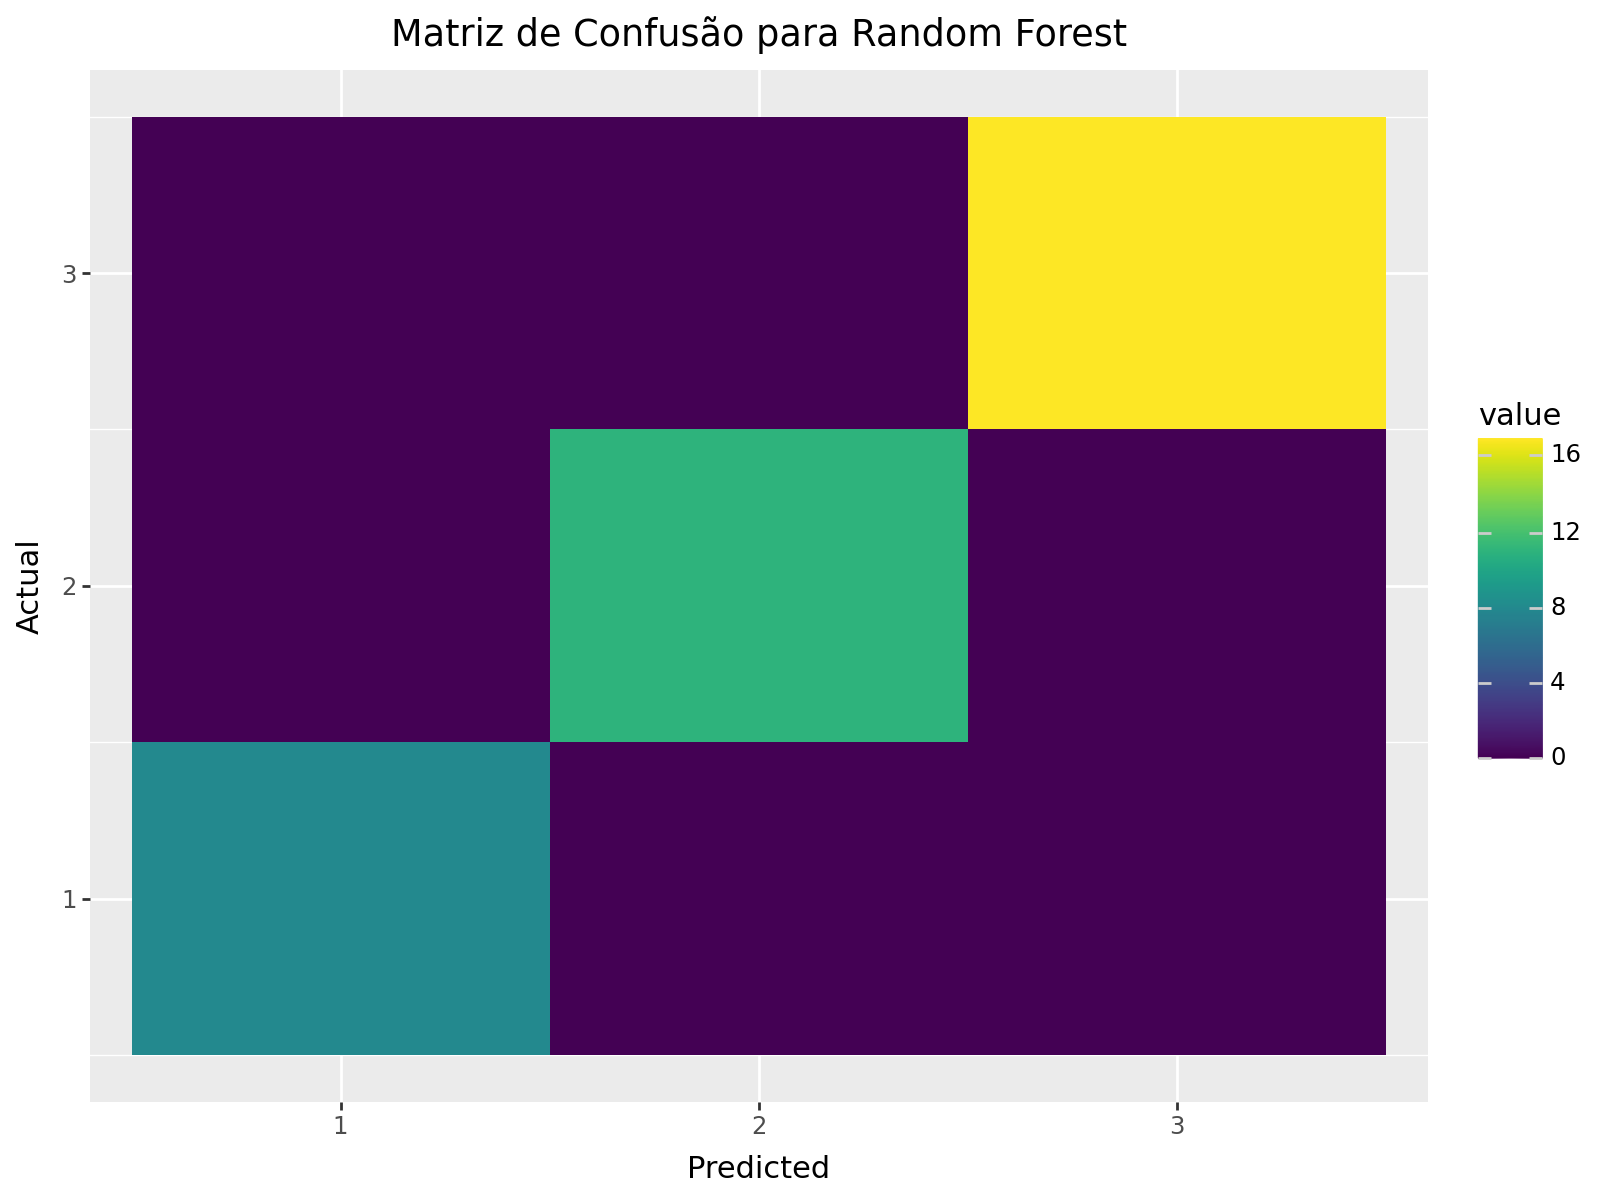

/tmp/ipykernel_23255/1262659006.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


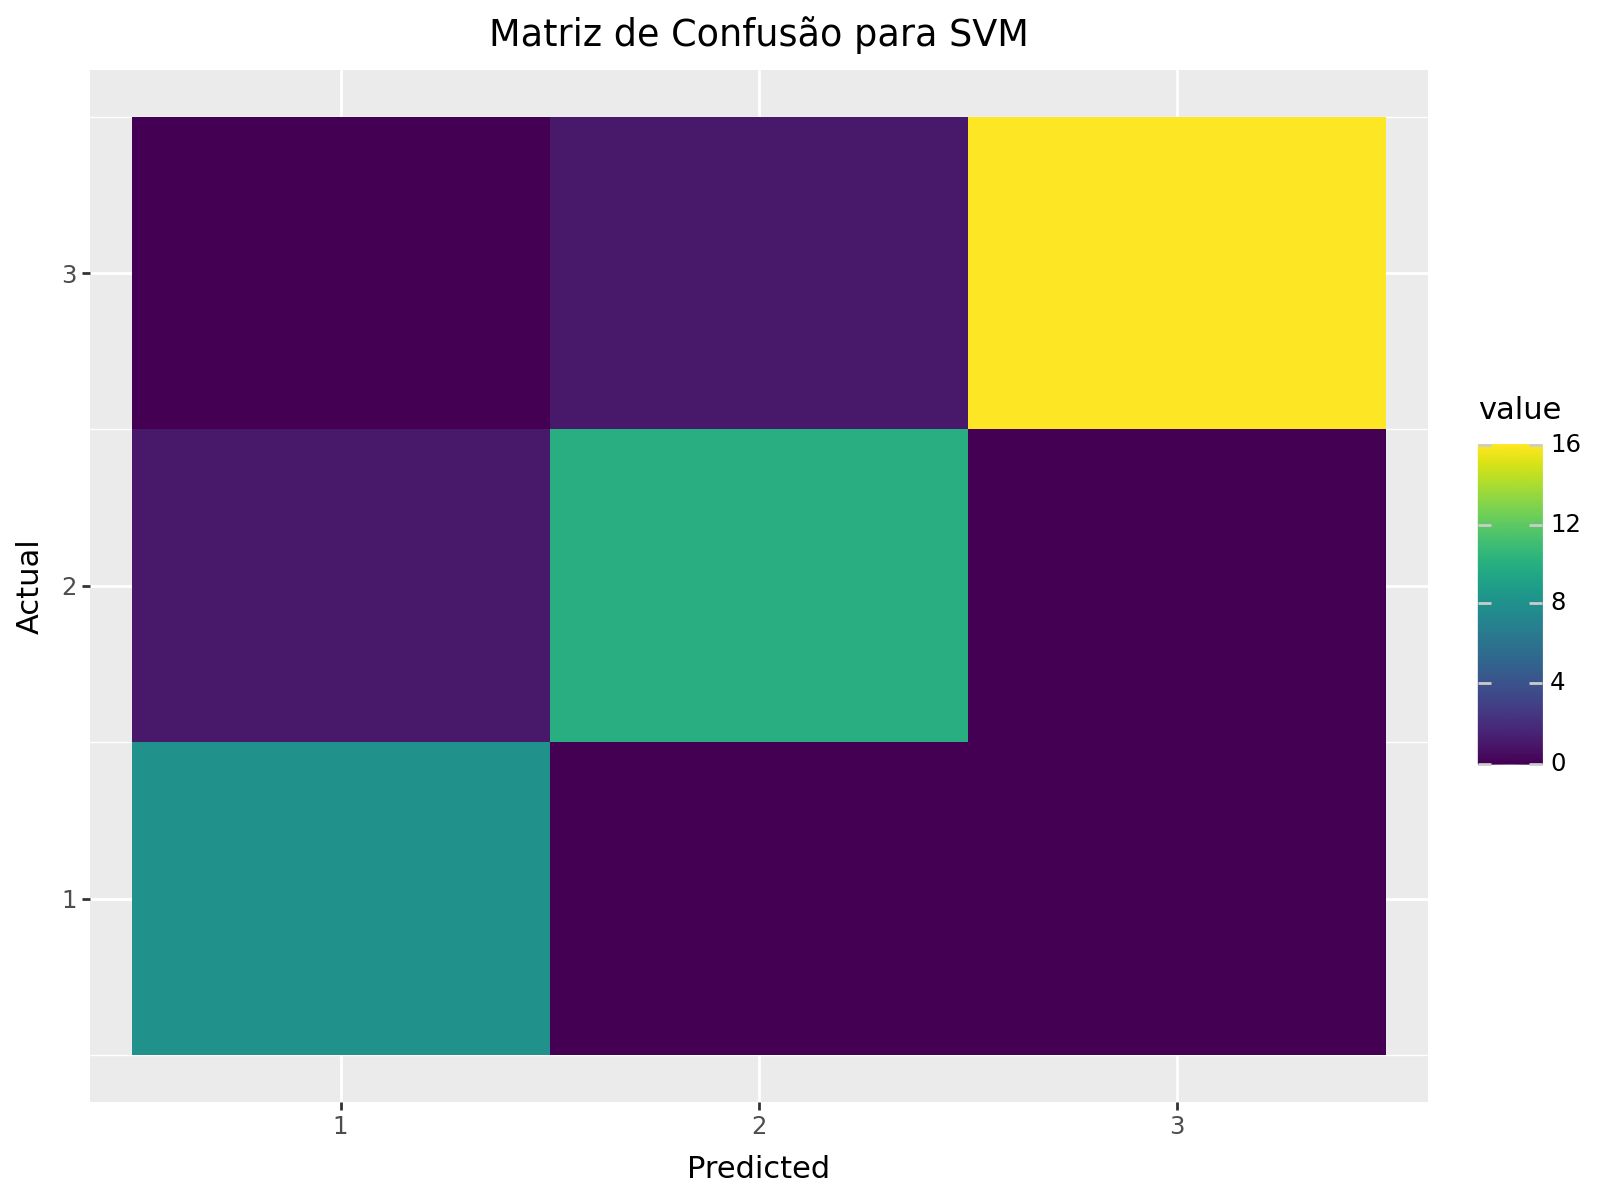

In [10]:
# Converter a matriz de confusão para um DataFrame para facilitar a visualização
def confusion_matrix_to_dataframe(cm, class_names):
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    df_cm = df_cm.reset_index().melt(id_vars='Actual')
    return df_cm

for model_name, metrics in results.items():
    cm_df = confusion_matrix_to_dataframe(metrics["Confusion Matrix"], [1, 2, 3])
    p = (ggplot(cm_df, aes(x='Predicted', y='Actual', fill='value'))
         + geom_tile()
         + labs(title=f'Matriz de Confusão para {model_name}', x='Predicted', y='Actual')
         + theme(figure_size=(8, 6)))
    print(p)


/tmp/ipykernel_23255/178514648.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


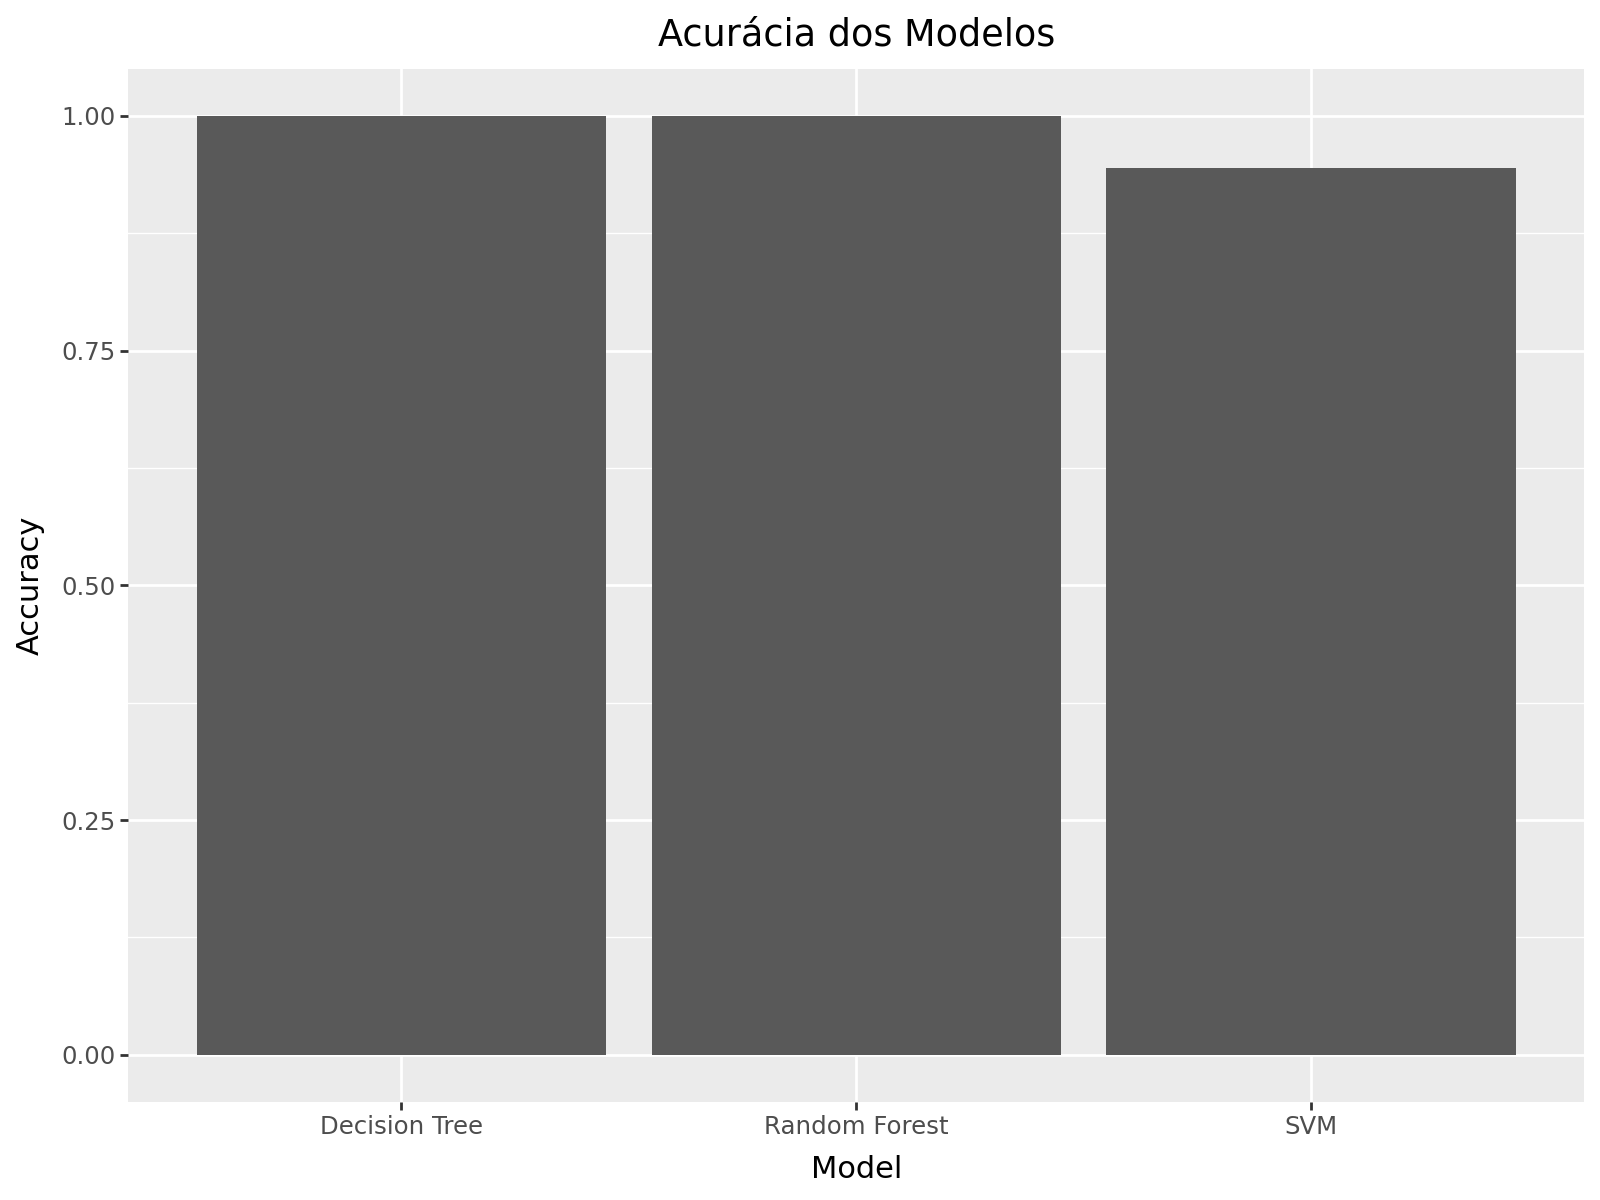

In [11]:
# Coletar acurácias em um DataFrame para visualização
accuracy_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [metrics["Accuracy"] for metrics in results.values()]
})

p = (ggplot(accuracy_df, aes(x='Model', y='Accuracy'))
     + geom_bar(stat='identity')
     + labs(title='Acurácia dos Modelos', x='Model', y='Accuracy')
     + theme(figure_size=(8, 6)))
print(p)


/tmp/ipykernel_23255/1971622104.py:20: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


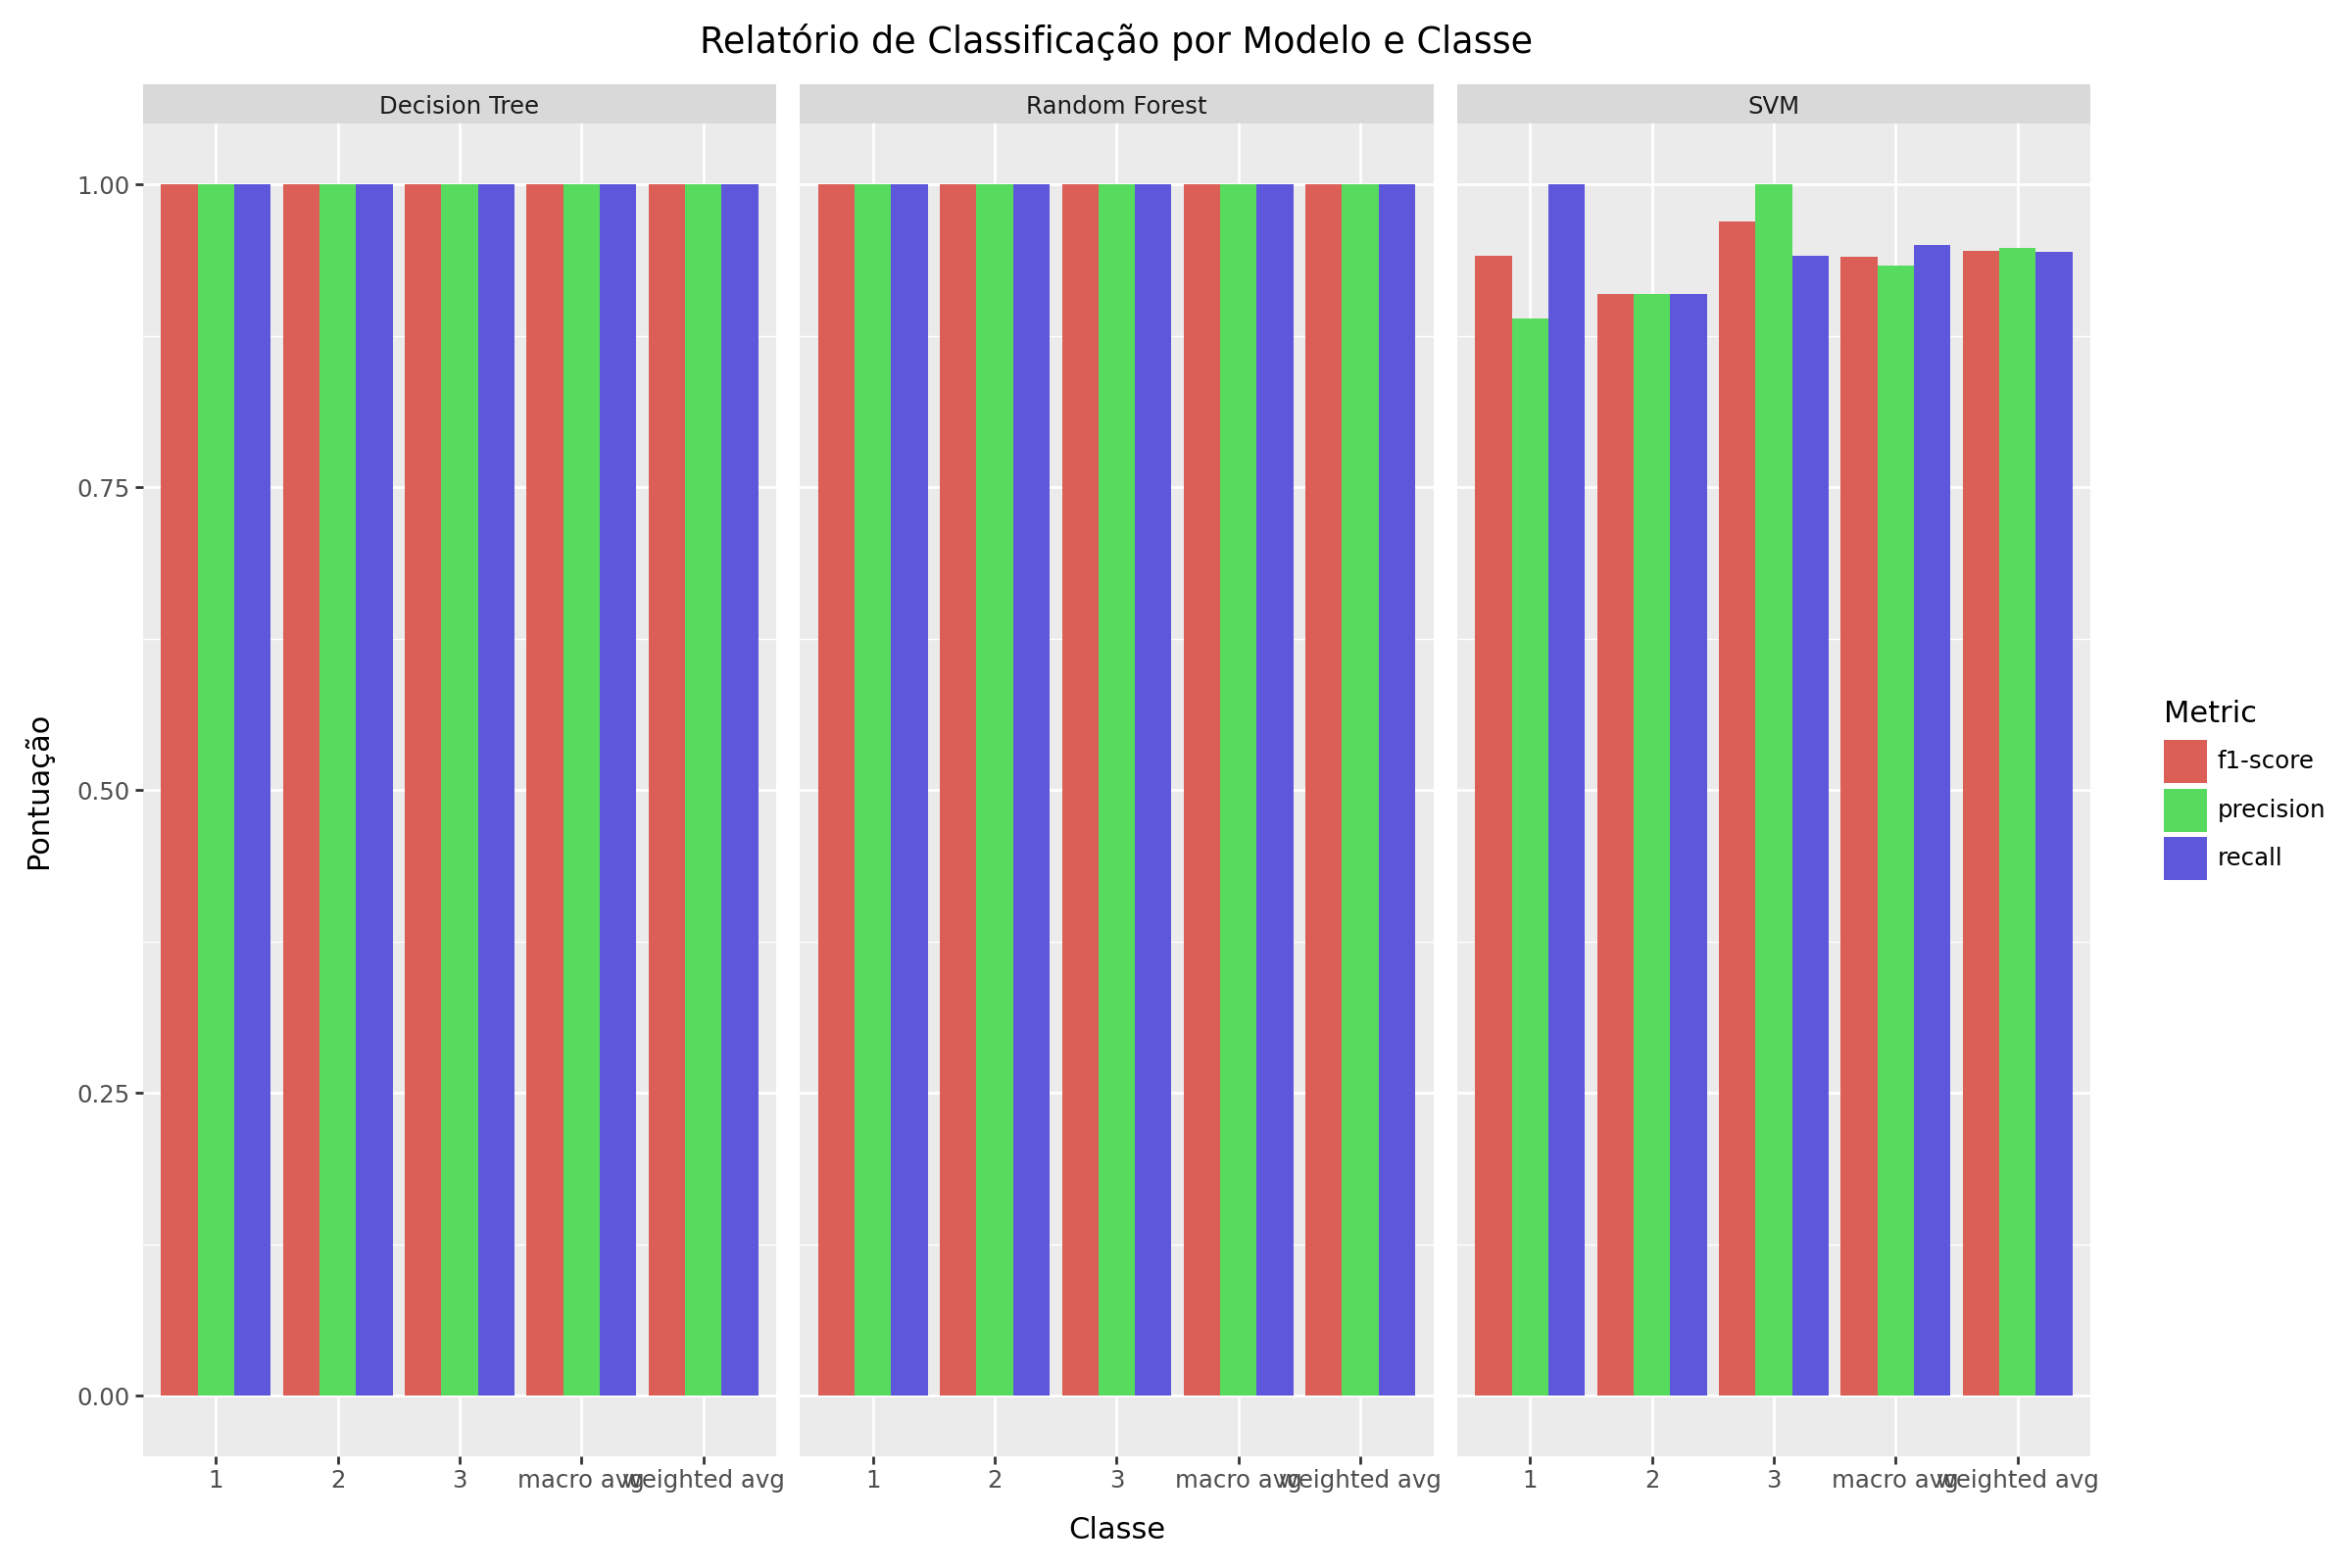

In [12]:
# Coletar as métricas do relatório de classificação em um DataFrame para visualização
report_df_list = []
for model_name, metrics in results.items():
    report = metrics["Classification Report"]
    for label, scores in report.items():
        if isinstance(scores, dict):
            for metric, score in scores.items():
                report_df_list.append([model_name, label, metric, score])

report_df = pd.DataFrame(report_df_list, columns=["Model", "Class", "Metric", "Score"])

# Filtrar apenas as métricas principais (precision, recall, f1-score)
report_df = report_df[report_df["Metric"].isin(["precision", "recall", "f1-score"])]

p = (ggplot(report_df, aes(x='Class', y='Score', fill='Metric'))
     + geom_bar(stat='identity', position='dodge')
     + facet_wrap('Model')
     + labs(title='Relatório de Classificação por Modelo e Classe', x='Classe', y='Pontuação')
     + theme(figure_size=(12, 8)))
print(p)
